### Chapter 1: Spatial Statistics Fundamentals
Using built in functions from GeoPandas to get spatial statistics

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
gpd.__version__

'1.1.1'

In [3]:
# Get the European countries GeoJSON file
gdf_europe = gpd.read_file(r"C:\Users\debro\OneDrive\Documents\Python Development\geospatial-data-analysis\europe_data.geojson")
gdf_europe.head(10)

,ADMIN,CONTINENT,GDP_MD,GDP_YEAR,POP_EST,area,length,geometry
0,France,Europe,2715518,2019,67059887.0,1.252041e+12,1.289400e+07,"MULTIPOLYGON (((2.53703 51.06461, 2.54706 51.0..."
1,Ukraine,Europe,153781,2019,44385155.0,1.338367e+12,9.840661e+06,"MULTIPOLYGON (((31.82584 52.10406, 31.85871 52..."
2,Belarus,Europe,63080,2019,9466856.0,5.868692e+11,4.597675e+06,"POLYGON ((23.60231 51.53078, 23.58867 51.5359,..."
3,Lithuania,Europe,54627,2019,2786844.0,2.002516e+11,2.484811e+06,"MULTIPOLYGON (((26.60383 55.64327, 26.60766 55..."
4,Czechia,Europe,250680,2019,10669709.0,1.883524e+11,2.678150e+06,"POLYGON ((14.83168 50.85798, 14.86786 50.86439..."
5,Germany,Europe,3861123,2019,83132799.0,9.084471e+11,9.224765e+06,"MULTIPOLYGON (((13.78586 48.72478, 13.78358 48..."
6,Estonia,Europe,31471,2019,1326590.0,1.690061e+11,3.898319e+06,"MULTIPOLYGON (((24.31666 57.87726, 24.32439 57..."
7,Latvia,Europe,34102,2019,1912789.0,2.154505e+11,2.857588e+06,"POLYGON ((27.52817 57.52848, 27.5228 57.49202,..."
8,Norway,Europe,403336,2019,5347896.0,3.430554e+12,8.962507e+07,"MULTIPOLYGON (((20.36272 69.02925, 20.10227 69..."
9,Sweden,Europe,530883,2019,10285453.0,2.163012e+12,1.819682e+07,"MULTIPOLYGON (((20.67546 69.01817, 20.79535 69..."


In [4]:
# See the descriptive statissics of the dataset
gdf_europe.describe()

,GDP_MD,GDP_YEAR,POP_EST,area,length
count,5.000000e+01,50.00000,5.000000e+01,5.000000e+01,5.000000e+01
mean,3.988899e+05,2018.58000,1.204196e+07,3.722170e+11,6.065145e+06
std,8.024171e+05,1.12649,2.009446e+07,6.493154e+11,1.306974e+07
min,-9.900000e+01,2014.00000,8.250000e+02,2.204709e+04,5.743123e+02
25%,8.936500e+03,2019.00000,5.319638e+05,9.718312e+09,9.772864e+05
50%,6.191600e+04,2019.00000,4.504472e+06,1.236043e+11,2.562874e+06
75%,3.790495e+05,2019.00000,1.028144e+07,4.202744e+11,6.366941e+06
max,3.861123e+06,2019.00000,8.313280e+07,3.430554e+12,8.962507e+07


In [5]:
# Calculate the correlation between relevant data columns
gdf_europe[["GDP_MD", "GDP_YEAR", "POP_EST", "area", "length"]].corr()

,GDP_MD,GDP_YEAR,POP_EST,area,length
GDP_MD,1.000000,0.187422,0.923238,0.327750,0.228436
GDP_YEAR,0.187422,1.000000,0.226922,0.217493,0.167848
POP_EST,0.923238,0.226922,1.000000,0.367634,0.194094
area,0.327750,0.217493,0.367634,1.000000,0.849840
length,0.228436,0.167848,0.194094,0.849840,1.000000


In [6]:
# View the extreme values of the dataset
print("The largest and smallest countries by area:\nFirst the smallest 3 countries:\n")
display(gdf_europe.sort_values(by="area", ascending=True).head(3)[["ADMIN", "area"]])
print("\nNow the largest 3 countries:\n")
display(gdf_europe.sort_values(by="area", ascending=False).head(3)[["ADMIN", "area"]])

The largest and smallest countries by area:
First the smallest 3 countries:



,ADMIN,area
42,Vatican,2.204709e+04
41,Gibraltar,5.671709e+06
35,Monaco,3.610330e+07



Now the largest 3 countries:



,ADMIN,area
8,Norway,3.430554e+12
9,Sweden,2.163012e+12
10,Finland,1.810924e+12


Create historgrams of area, boundary length, population, and GDP.

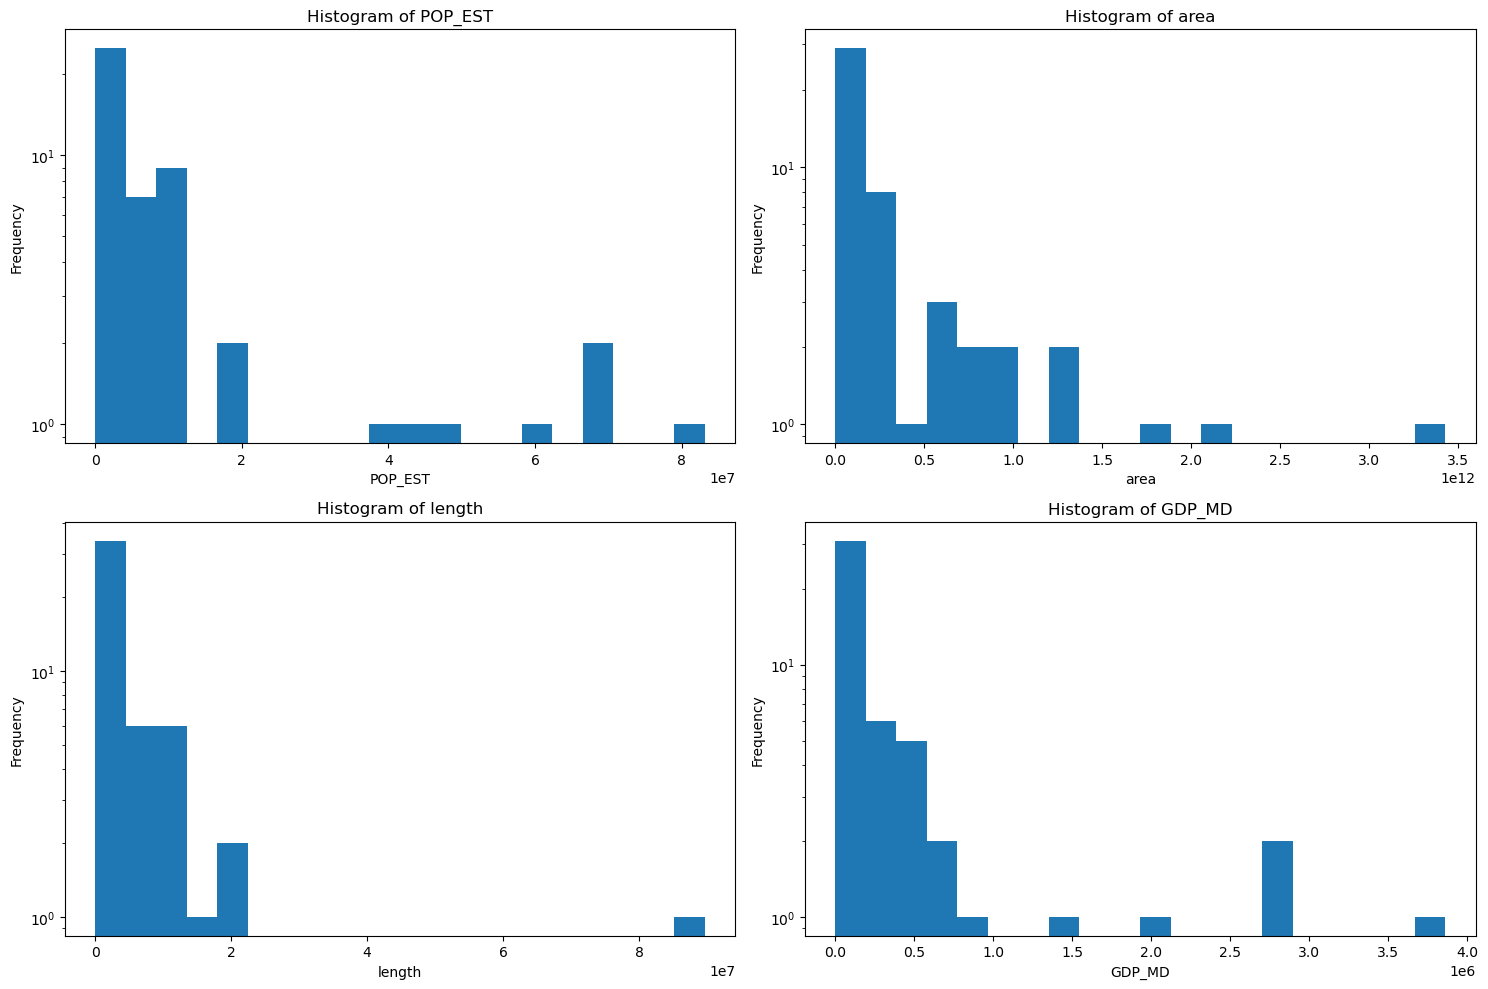

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

features = ["POP_EST", "area", "length", "GDP_MD"]
indices = [(i, j) for i in range(2) for j in range(2)]

for idx, feature in enumerate(features):
    bx = ax[indices[idx]]
    gdf_europe[feature].plot.hist(bins=20, ax=bx)
    bx.set_title(f'Histogram of {feature}')
    bx.set_xlabel(feature)
    bx.set_yscale("log")

plt.tight_layout()
plt.show()

Show the population and GDP values are skewed to the right, with substantial disparaties in the data shown to the right.
#### Global Spatial Autocorrelation
Quantifies the degree to which a set of spatial features and their associated data are correlated and tend to be clustered together in space. Correlation of a variable with itself through geographies.

Popular quantifications: Moran's I statistics

- Positive $\rightarrow$ spatial clustering of similar values
- Negative $\rightarrow$ dispersion of similar values

Need `libpysal` and `esda` to calculate these statistics


In [8]:
import libpysal as lps
import esda
import numpy as np

print(lps.__version__)
print(esda.__version__)

4.13.0
2.8.0


Capture influence of neighbors using the Queen contiguity method. Calculate a weight matrix from the DataFrame.

In [9]:
w = lps.weights.Queen.from_dataframe(gdf_europe)

C:\Users\debro\AppData\Local\Temp\ipykernel_26944\2092164283.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(gdf_europe)
c:\Users\debro\miniconda3\envs\gis\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 7 islands with ids: 43, 44, 45, 46, 47, 48, 49.
  W.__init__(self, neighbors, ids=ids, **kw)


Comments show there are islands and 10 disconnected components. Use the indicies which are disonnected.

In [10]:
gdf_europe.iloc[range(43, 50), :]

,ADMIN,CONTINENT,GDP_MD,GDP_YEAR,POP_EST,area,length,geometry
43,Iceland,Europe,24188,2019,361313.0,5.712275e+11,1.241943e+07,"MULTIPOLYGON (((-14.61075 66.36323, -14.7882 6..."
44,Malta,Europe,14989,2019,502653.0,4.976536e+08,1.337032e+05,"MULTIPOLYGON (((14.56316 35.87002, 14.56715 35..."
45,Jersey,Europe,5080,2015,107800.0,2.787982e+08,8.229169e+04,"POLYGON ((-2.06786 49.25068, -2.02066 49.23526..."
46,Guernsey,Europe,3465,2015,62792.0,1.751194e+08,9.517214e+04,"MULTIPOLYGON (((-2.55956 49.49934, -2.5382 49...."
47,Isle of Man,Europe,7491,2018,84584.0,1.678705e+09,2.046426e+05,"POLYGON ((-4.62076 54.06965, -4.63126 54.07062..."
48,Aland,Europe,1563,2016,29884.0,3.798280e+09,1.196779e+06,"MULTIPOLYGON (((20.29762 60.12153, 20.28517 60..."
49,Faroe Islands,Europe,3116,2018,48678.0,6.034814e+09,1.567184e+06,"MULTIPOLYGON (((-6.6776 61.39411, -6.69978 61...."


In a naive sense, since these countries/landmasses do not have neighbors, they do not have any values that might be correlated to their neighbors since they do not have neighbors.

In [11]:
w.weights

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0],
 7: [1.0, 1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0],
 10: [1.0, 1.0],
 11: [1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 22: [1.0],
 23: [1.0],
 24: [1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0],
 29: [1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0],
 35: [1.0],
 36: [1.0, 1.0],
 37: [1.0, 1.0, 1.0, 1.0, 

We see the weights are the same if a country touches another country.

Calculating the Moran's I stat:

In [12]:
# Import Moran class
from esda.moran import Moran
# Set target variable
target = "GDP_MD"
# Calculate Moran's I
moran = Moran(gdf_europe[target], w)
# Print Moran's I results
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 44, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 48, ' is an island (no neighbors)')
('WARNING: ', 49, ' is an island (no neighbors)')
Moran's I: 0.0821081499608062, p-value: 0.15


Do not accept the Moran's I statistical value as statistically significant and GDP does not show a high level amount of spatial clustering. What if we change the target variable to area instead of GDP?

In [13]:
# Set target variable
target = "area"
# Calculate Moran's I
moran = Moran(gdf_europe[target], w)
# Print Moran's I results
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

Moran's I: 0.6476646431296472, p-value: 0.002


Two countries with similar sizes are more likely to be neighboring countries, but is this spurious? 

Could GDP be correlated if you localize the autocorrelation calculation? You can get a correlation for each polygon in the dataset.

In [14]:
from esda.moran import Moran_Local

# Calclate the weight matrix
# Already completed above:
# w = lps.weights.Queen.from_dataframe(gdf_europe)
# Normalize the GDP by the population estimate
gdf_europe["GDP_per_capita"] = gdf_europe["GDP_MD"] / gdf_europe["POP_EST"]
# Calculate Local Moran's I
moran_local = Moran_Local(gdf_europe["GDP_per_capita"], w)
# Add Local Moran's I values to the GeoDataFrame
gdf_europe["Local_Moran_I"] = moran_local.Is
# Display the first few rows of the updated GeoDataFrame
gdf_europe.head()

c:\Users\debro\miniconda3\envs\gis\Lib\site-packages\esda\moran.py:1354: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


,ADMIN,CONTINENT,GDP_MD,GDP_YEAR,POP_EST,area,length,geometry,GDP_per_capita,Local_Moran_I
0,France,Europe,2715518,2019,67059887.0,1.252041e+12,1.289400e+07,"MULTIPOLYGON (((2.53703 51.06461, 2.54706 51.0...",0.040494,0.025398
1,Ukraine,Europe,153781,2019,44385155.0,1.338367e+12,9.840661e+06,"MULTIPOLYGON (((31.82584 52.10406, 31.85871 52...",0.003465,0.463090
2,Belarus,Europe,63080,2019,9466856.0,5.868692e+11,4.597675e+06,"POLYGON ((23.60231 51.53078, 23.58867 51.5359,...",0.006663,0.397065
3,Lithuania,Europe,54627,2019,2786844.0,2.002516e+11,2.484811e+06,"MULTIPOLYGON (((26.60383 55.64327, 26.60766 55...",0.019602,0.245179
4,Czechia,Europe,250680,2019,10669709.0,1.883524e+11,2.678150e+06,"POLYGON ((14.83168 50.85798, 14.86786 50.86439...",0.023495,0.046502


Visualize the local Moran I in a plot

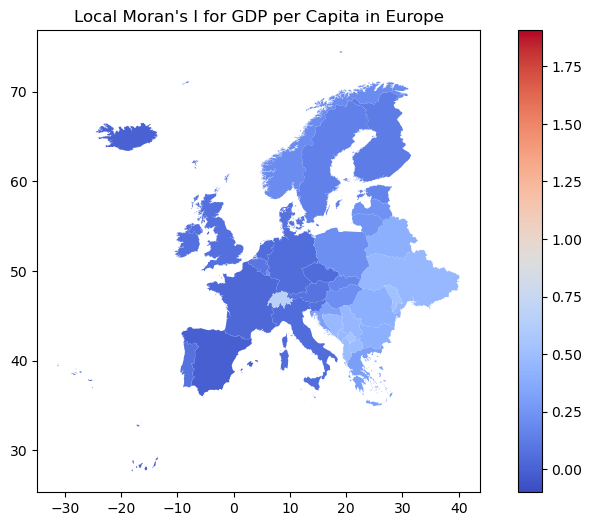

In [15]:
gdf_europe.plot(column="Local_Moran_I", cmap="coolwarm", legend=True, figsize=(10, 6))
plt.title("Local Moran's I for GDP per Capita in Europe")
plt.show()

What happens when data is missing? How do we impute missing values?

Use **Inverse Distance Weighting (IDW)** - points closer to the location of interest will have greater influence than those farther away. Tobler's first law of geography: everything is related to everything else, but near things are more related than distant things.

In [17]:
# Add x & y coordinates of centroids
gdf_europe["x"] = gdf_europe.to_crs(3857).geometry.centroid.x
gdf_europe["y"] = gdf_europe.to_crs(3857).geometry.centroid.y
gdf_europe.head(3)

,ADMIN,CONTINENT,GDP_MD,GDP_YEAR,POP_EST,area,length,geometry,GDP_per_capita,Local_Moran_I,x,y
0,France,Europe,2715518,2019,67059887.0,1.252041e+12,1.289400e+07,"MULTIPOLYGON (((2.53703 51.06461, 2.54706 51.0...",0.040494,0.025398,2.821952e+05,5.889750e+06
1,Ukraine,Europe,153781,2019,44385155.0,1.338367e+12,9.840661e+06,"MULTIPOLYGON (((31.82584 52.10406, 31.85871 52...",0.003465,0.463090,3.475855e+06,6.313355e+06
2,Belarus,Europe,63080,2019,9466856.0,5.868692e+11,4.597675e+06,"POLYGON ((23.60231 51.53078, 23.58867 51.5359,...",0.006663,0.397065,3.121669e+06,7.090783e+06


In [21]:
# Pick 3 countries to replace with nulls in a copied GeoDataFrame
gdf_europe_nulls = gdf_europe.copy()
gdf_europe_nulls.loc[gdf_europe_nulls["ADMIN"].isin(["Estonia", "Bulgaria", "Slovakia"]), "GDP_MD"] = np.nan
# See the dataframes with nulls
gdf_europe_nulls.loc[gdf_europe_nulls["ADMIN"].isin([
    "Estonia", "Bulgaria", "Slovakia"
]), ['ADMIN', 'GDP_MD']]

,ADMIN,GDP_MD
6,Estonia,NaN
20,Slovakia,NaN
33,Bulgaria,NaN


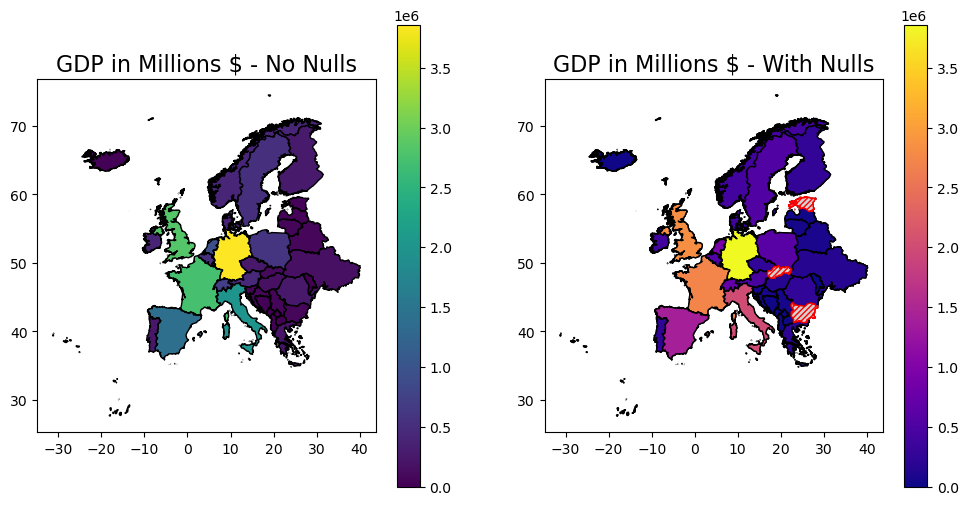

In [38]:
# Visualize the two datasets on a map - one with missing values and one without
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Set common maximum and minimum for color scale
vmin, vmax = gdf_europe["GDP_MD"].min(), gdf_europe["GDP_MD"].max()
# Plot the original dataset
gdf_europe.plot(column="GDP_MD", cmap="viridis", edgecolor="k", vmin=vmin, vmax=vmax, legend=True, ax=ax[0])
ax[0].set_title("GDP in Millions $ - No Nulls", fontsize=16)
# Plot the dataset with nulls
gdf_europe.plot(color="none", edgecolor="black", ax=ax[1])  # Plot country borders
gdf_europe_nulls.plot(column="GDP_MD", cmap="plasma", edgecolor="k", vmin=vmin, vmax=vmax, legend=True, ax=ax[1], missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "//////"})
ax[1].set_title("GDP in Millions $ - With Nulls", fontsize=16)
plt.show()

In [39]:
# Grab scipy.spatial functions for interpolation
from scipy.spatial import cKDTree
# Split dataset into two parts countries with known GDP and countries with unknown GDP
known = gdf_europe_nulls[gdf_europe_nulls["GDP_MD"].notnull()]
unknown = gdf_europe_nulls[gdf_europe_nulls["GDP_MD"].isnull()]
# Check that there are 3 records in the unknown gdf
len(unknown)

3

In [43]:
# Extract the coordinates
xi, yi, zi = known["x"].values, known["y"].values, known["GDP_MD"].values
# Interpolated values
xi_interp = unknown["x"].values
yi_interp = unknown["y"].values

In [44]:
tree = cKDTree(np.c_[xi, yi])
distances, idx = tree.query(np.c_[xi_interp, yi_interp], k=8)  # Using 8 nearest neighbors
# Inverse Distance Weighting (IDW) interpolation
weights = 1 / distances**2
weights /= weights.sum(axis=1)[:, None]
zi_interp = np.sum(weights * zi[idx], axis=1)

In [45]:
# Assign the interpolated values back into the countries
gdf_europe_interp = gdf_europe_nulls.copy()
gdf_europe_interp.loc[gdf_europe_interp["GDP_MD"].isnull(), "GDP_MD"] = zi_interp

In [46]:
gdf_europe.loc[gdf_europe_interp["ADMIN"].isin(["Estonia", "Bulgaria", "Slovakia"]), ["ADMIN", "GDP_MD"]].merge(gdf_europe_interp.loc[gdf_europe_interp["ADMIN"].isin(["Estonia", "Bulgaria", "Slovakia"]), ["ADMIN", "GDP_MD"]], on="ADMIN", suffixes=("_original", "_interpolated"))

,ADMIN,GDP_MD_original,GDP_MD_interpolated
0,Estonia,31471,87067.032480
1,Slovakia,105079,204163.082716
2,Bulgaria,68558,75490.085624


Estimated GDP values are not too great, but look directionally correct.

In [48]:
gdf_europe.loc[gdf_europe_interp["ADMIN"].isin(["Estonia", "Bulgaria", "Slovakia"]), ["ADMIN", "GDP_MD"]].merge(gdf_europe_interp.loc[gdf_europe_interp["ADMIN"].isin(["Estonia", "Bulgaria", "Slovakia"]), ["ADMIN", "GDP_MD"]], on="ADMIN", suffixes=("_original", "_interpolated")).drop(columns="ADMIN").corr()

,GDP_MD_original,GDP_MD_interpolated
GDP_MD_original,1.000000,0.819965
GDP_MD_interpolated,0.819965,1.000000


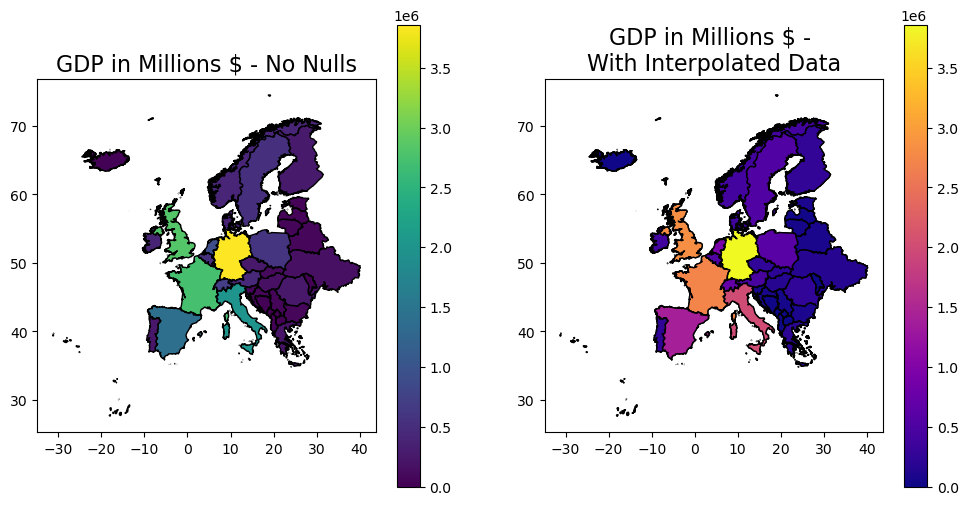

In [50]:
# Visualize the two datasets on a map - one with missing values and one without
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Set common maximum and minimum for color scale
vmin, vmax = gdf_europe["GDP_MD"].min(), gdf_europe["GDP_MD"].max()
# Plot the original dataset
gdf_europe.plot(column="GDP_MD", cmap="viridis", edgecolor="k", vmin=vmin, vmax=vmax, legend=True, ax=ax[0])
ax[0].set_title("GDP in Millions $ - No Nulls", fontsize=16)
# Plot the dataset with nulls
gdf_europe.plot(color="none", edgecolor="black", ax=ax[1])  # Plot country borders
gdf_europe_interp.plot(column="GDP_MD", cmap="plasma", edgecolor="k", vmin=vmin, vmax=vmax, legend=True, ax=ax[1], missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "//////"})
ax[1].set_title("GDP in Millions $ - \nWith Interpolated Data", fontsize=16)
plt.show()